In [ ]:
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [ ]:
# 2d & 3d predictive plots

def get_predictive_curve(model, df, npd=50):
    x = np.linspace(df[df.columns[0]].values.min(), df[df.columns[0]].values.max(), npd)
    test_df = pd.DataFrame({"x": x})
    return x, model.predict(test_df), df

def plot_predictive_curve(x_test, y_test, df):
    plt.plot(x_test, y_test)
    plt.scatter(df[df.columns[0]].values, df[df.columns[1]].values)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


def get_predictive_surface(model, df, npd=50):
    x1 = np.linspace(df[df.columns[0]].values.min(), df[df.columns[0]].values.max(), npd)
    x2 = np.linspace(df[df.columns[1]].values.min(), df[df.columns[1]].values.max(), npd)
    xx1, xx2 = np.meshgrid(x1, x2)
    x_test = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = model.predict(pd.DataFrame({"x1": x_test[:, 0], "x2": x_test[:, 1]}))
    y_pred = np.array(y_pred).reshape(xx1.shape)
    return xx1, xx2, y_pred, df

def plot_predictive_surface(xx1, xx2, y_pred, df):
    surface = go.Surface(x=xx1, y=xx2, z=y_pred, opacity=0.8)
    # scatter = go.Scatter(x=df[df.columns[0]].values, # какого черта?
    #                      y=df[df.columns[1]].values,
    #                      z=df[df.columns[2]].values,
    #                      mode="markers")
    fig = go.Figure(data=[surface])
    fig.show()

Functions for the cases of either no slope or no intercept

In [ ]:
# 2d & 3d coef/loss plots

def custom_predict1d(x, b, fit_intercept=False):
  if fit_intercept:
    return b
  else: return x*b 

def get_loss_curve(model, df, npd=50, fit_intercept=False):
  b = model.params[0]
  #b, name = (model.params["Intercept"], "Intercept" or model.params["x"], "x")
  betas = np.linspace(b-5*b, b+5*b, npd)
  results = []
  for beta in betas:
    residuals = []
    for x, y in zip(df[df.columns[0]].values, df[df.columns[1]].values):
      y_pred = custom_predict1d(x, beta, fit_intercept)
      residuals.append((y - y_pred)**2)
    results.append(np.mean(residuals))


  # for x, beta, y in zip(df[df.columns[0]].values, betas, df[df.columns[1]].values):
  #   residuals.append((y - custom_predict1d(x, beta, fit_intercept))**2)
  return betas, results, fit_intercept

def plot_loss_curve(betas, results, fit_intercept=False):
  plt.plot(betas, results)
  if fit_intercept:
    plt.xlabel("B0")
  else:
    plt.xlabel("B1")
  plt.ylabel("Residuals")
  plt.show()



    

Functions for the cases when we have both - slope(s) and intercept

In [ ]:
def custom_predict(x, betas, fit_intercept=False):
  if fit_intercept:
    return x*betas[1] + betas[0]
  else:
    return np.sum(x.dot(betas))


# beta0, beta1
# or 
# beta1, beta2
def get_loss_surface(model, df, npd=50, fit_intercept=False):
  print(model.params)
  b1, b2 = model.params
  # write over them, we do not need them anymore
  b1 = np.linspace(b1-5*b1, b1+5*b1, npd)
  b2 = np.linspace(b2-5*b2, b2+5*b2, npd)
  bb1, bb2 = np.meshgrid(b1, b2)
  array_of_betas = np.c_[bb1.ravel(), bb2.ravel()]
  results = []
  for betas in array_of_betas:
    residuals = []

    for x, y in zip(df[df.columns[:-1]].values, df[df.columns[-1]].values):
      y_pred = custom_predict(x, betas, fit_intercept)
      residuals.append((y - y_pred)**2)
    results.append(np.mean(residuals))
  results = np.array(results).reshape(bb1.shape)
  opt_residuals = []
  for x, y in zip(df[df.columns[:-1]].values, df[df.columns[-1]].values):
    y_pred = custom_predict(x, [b1, b2], fit_intercept)
    opt_residuals.append((y - y_pred)**2)

  optimal = np.mean(opt_residuals)
  return bb1, bb2, results, (b1, b2, optimal), fit_intercept


def plot_loss_surface(bb1, bb2, results, optimal, fit_intercept):
  surface = go.Surface(x=bb1, y=bb2, z=results, opacity=0.8)
  # if fit_intercept:
  #   surface.xlabel = "B0"
  #   surface.ylabel = "B1"
  # else:
  #   surface.xlabel = "B1"
  #   surface.ylabel = "B2"
  # surface.zlabel = "RSS"
  #scatter = go.Scatter(x=[optimal[0]], y=[optimal[1]], z=[optimal[2]], mode="markers")
  fig = go.Figure(data=[surface])
  fig.show()

  



No X, no slope. Only intercept

In [ ]:
y = [1, 2, 3]
df = pd.DataFrame({"y": y})
reg = ols(formula = "y ~ 1", data=df)

In [ ]:
reg = reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 06 Jun 2021   Prob (F-statistic):                nan
Time:                        14:22:36   Log-Likelihood:                -3.6486
No. Observations:                   3   AIC:                             9.297
Df Residuals:                       2   BIC:                             8.396
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      0.577      3.464      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning:

invalid value encountered in double_scalars



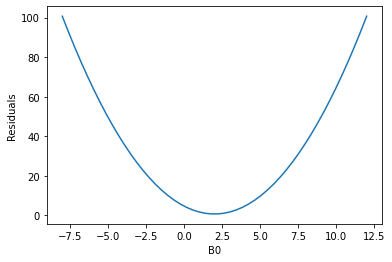

In [ ]:
y = [1, 2, 3]
x = [1, 1, 1]
df = pd.DataFrame({"x": x, "y": y})
plot_loss_curve(*get_loss_curve(reg, df, npd=50, fit_intercept=True))

In [ ]:
# Playing with syntax
# The one that is not None will be assigned
b, name = (reg.params["Intercept"], "Intercept") or (reg.params["x"], "x")
b, name

(2.0, 'Intercept')

In [ ]:
type(reg.summary()), type(reg)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



(statsmodels.iolib.summary.Summary,
 statsmodels.regression.linear_model.RegressionResultsWrapper)

----------------------

In [ ]:
x = [3, 2, 1]
y = [1, 2, 3]
df = pd.DataFrame({"x": x, "y": y})
reg = ols(formula = "y ~ x - 1", data=df)

In [ ]:
reg = reg.fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                              2.083
Date:                Sun, 06 Jun 2021   Prob (F-statistic):                       0.286
Time:                        14:22:36   Log-Likelihood:                         -5.4968
No. Observations:                   3   AIC:                                      12.99
Df Residuals:                       2   BIC:                                      12.09
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



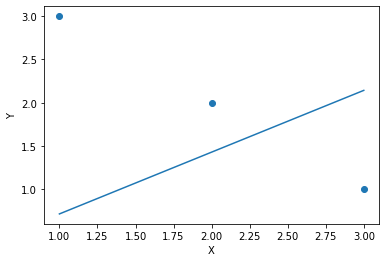

In [ ]:
# Both - predictive and loss curve are plotted, using the nested structure
plot_predictive_curve(*get_predictive_curve(reg, df))

In [ ]:
#get_loss_curve(reg, df, npd=50, fit_intercept=True)

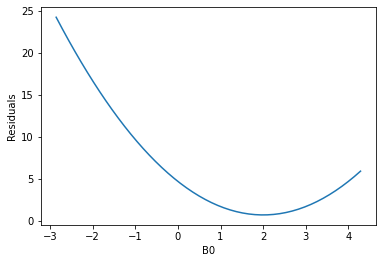

In [ ]:
plot_loss_curve(*get_loss_curve(reg, df, npd=50, fit_intercept=True))

----------------

In [ ]:
x = [3, 2, 1]
y = [1, 2, 3]
df = pd.DataFrame({"x": x, "y": y})
reg = ols(formula = "y ~ x", data=df)

In [ ]:
reg = reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:22:37   Log-Likelihood:                    inf
No. Observations:                   3   AIC:                              -inf
Df Residuals:                       1   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0000          0        inf      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning:

divide by zero encountered in true_divide



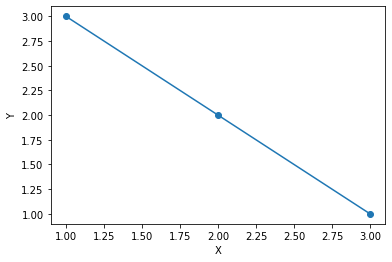

In [ ]:
plot_predictive_curve(*get_predictive_curve(reg, df))

In [ ]:
plot_loss_surface(*get_loss_surface(reg, df, fit_intercept=True))

Intercept    4.0
x           -1.0
dtype: float64


--------------------

2 x's without intercept

In [ ]:
x1 = [3, 2, 1]
x2 = [4, 5, 6]
y = [1, 2, 3]
df = pd.DataFrame({"x1": x1,"x2": x2, "y": y})
reg = ols(formula = "y ~ x1 + x2 -1", data=df)

In [ ]:
reg = reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.507e+30
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           3.00e-16
Time:                        14:22:39   Log-Likelihood:                 102.23
No. Observations:                   3   AIC:                            -200.5
Df Residuals:                       1   BIC:                            -202.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4286   3.41e-16  -1.26e+15      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



In [ ]:
plot_predictive_surface(*get_predictive_surface(reg, df))

In [ ]:
plot_loss_surface(*get_loss_surface(reg, df, fit_intercept=False))

x1   -0.428571
x2    0.571429
dtype: float64
